# Numpyの確認課題

## 必要モジュールのインポート

この問題で使うモジュールをインポートします．

In [58]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(0)

---

### 問1. `ndarray`の生成

以下の2つの`ndarray`を定義しなさい．
- 観測値 `x`: 初項`0`，末項`5`，項数`100`の等差数列
- ノイズ `noise`: 標準正規分布に従う`100`個の乱数

In [59]:

import numpy as np

x = np.linspace(0, 5, 100)

noise = np.random.normal(0, 1, 100)


---

ここで，真の関数 $y(x) = 3 - 5x + x^2$ を定義します．

In [60]:
def y(x):
    """真の関数"""
    return 3 - 5 * x + x ** 2


### 問2． `ndarray`の操作

問1で生成した観測値 `x` に対応する目標値 `t` を定義しなさい．

目標値 $t$ は， $t = y(x) + \epsilon$ と表されます．  ( $y$: 真の関数, $\epsilon$: ノイズ )  
実際の観測値にはどうしてもノイズ(観測誤差)が発生してしまいます．今回は，それを`noise`で再現します．

問1で観測値を100個生成したので，それぞれに対応する目標値も100個作成する必要がありますが， `for` 文は絶対使ってはいけません．

In [61]:

def Ans(a,b):
  ANS = a + b
  return ANS

t= Ans(y(x),noise)


matplotlib で可視化すると以下のようなグラフになります．
scatter → 散布図

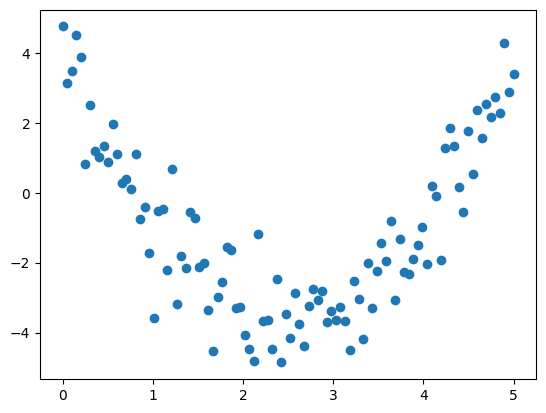

In [62]:
plt.scatter(x, t)

---

In [63]:

x0 = np.ones((1, len(x))) 
x1 = x.reshape((1, len(x)))  
x2 = (x1**2).reshape((1, len(x))) 

Ans = np.concatenate((x0, x1, x2), axis=0)

X = np.transpose(Ans)





### 問3. `ndarray`の結合

以下の3つの`ndarray`を垂直方向に結合した2次元配列を転置した行列 `X` を定義しなさい．

- x0: 長さが `x` と同じで要素が全て1の`ndarray`
- x1: 観測値 `x` の各要素を1乗した`ndarray`
- x2: 観測値 `x` の各要素を2乗した`ndarray`

例： $x = (1, 2, 3)$ のとき，

$$
x_0 = (1, 1, 1)\\
x_1 = (1, 2, 3)\\
x_2 = (1, 4, 9)
$$

だから，

$$
X = \left(
\begin{array}{ccc}
    1 & 1 & 1 \\
    1 & 2 & 3 \\
    1 & 4 & 9
\end{array}
\right)^T
= \left(
\begin{array}{ccc}
    1 & 1 & 1 \\
    1 & 2 & 4 \\
    1 & 3 & 9
\end{array}
\right)
$$

ちなみに，機械学習では `X` のような行列を計画行列と呼びます．

---

### 問4. 線形代数

観測値 `x, t` をもとに真の関数 `y` を2次関数で回帰しなさい．

任意の2次関数は $y(x) = w_0 + w_1 x + w_2 x^2$ と表すことができます．  
なので，パラメータのベクトル $\mathbf{w} = (w_0, w_1, w_2)$ を求めれば良いことになります．

これは以下の正規方程式から求めることができます．

$ \mathbf{w} = (X^T X)^{-1} X^T \mathbf{t} $

この式の導出はdev_data勉強会で学びます．

行列の積が多い場合は`np.dot`を使わない方が簡潔に書けます．

In [64]:
Xt = np.transpose(X)
XtX = np.dot(Xt,X)
XtX_inv = np.linalg.inv(XtX)
XtX_inv_Xt = np.dot(XtX_inv,Xt)
w = np.dot(XtX_inv_Xt,t)



w0, w1, w2 = w
pred_y = w0 + w1 * x + w2 * x ** 2


---

### 結果

先ほどのグラフに真の関数(緑)と回帰曲線(赤)を重ねると以下のようになります．

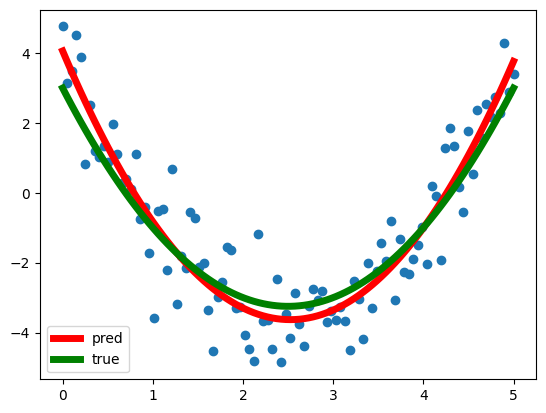

In [65]:
plt.scatter(x, t)
plt.plot(x, pred_y, linewidth=5, color="red", label="pred")
plt.plot(x, y(x), linewidth=5, color="green", label="true")
plt.legend()

今回使った手法は 真の関数 `y` の定義を変更するとその他のコードを全く変更しなくても同様に回帰することができます．

例えば以下のように変更したらその関数を回帰します．

```python
def y(x):
    """真の関数"""
    return 5 * np.sin(np.pi * x / 5)
```
dev_data勉強会で詳しくやりますが，この回帰曲線の表現力は2次までです．
カーブが2つ以上の曲線を回帰したい場合は問3の計画行列の列数を　`x3, x4...`　のように増やせば表現力が上がります．

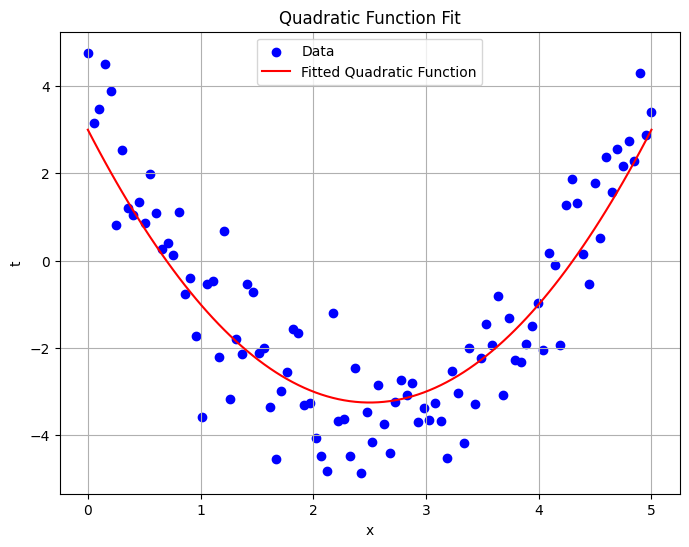

In [66]:

#以下chatgpt

import matplotlib.pyplot as plt
import numpy as np

x_vals = np.linspace(0, 5, 100)
y_vals = y(x_vals)


plt.figure(figsize=(8, 6))
plt.scatter(x, t, label='Data', color='blue')
plt.plot(x_vals, y_vals, label='Fitted Quadratic Function', color='red')
plt.xlabel('x')
plt.ylabel('t')
plt.title('Quadratic Function Fit')
plt.grid(True)
plt.legend()
plt.show()